In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/Social_Network_Ads.csv")
df['Gender'].replace({"Male":0, "Female":1}, inplace = True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [3]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
X = df[['User ID', 'Gender', 'Age', 'EstimatedSalary']]
Y = df[['Purchased']]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=29)

In [12]:
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Abhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [13]:
Y_pred = model.predict(X_test)

In [14]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [15]:
model.score(X_train,Y_train)

0.7833333333333333

In [10]:
model.score(X,Y)

0.785

In [16]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[63,  6],
       [13, 18]], dtype=int64)

In [17]:
print(confusion_matrix.__doc__)

Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.

    labels : array-like of shape (n_classes), default=None
        List of labels to index the matrix. This may be used to reorder
        or select a subset of labels.
        If ``None`` is given, those that appear at least once
        in ``y

In [18]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

In [19]:
print(tn, fp, fn, tp)

63 6 13 18


In [20]:
a = accuracy_score(Y_test, Y_pred)
a

0.81

In [21]:
e = 1-a
e

0.18999999999999995

In [22]:
precision_score(Y_test, Y_pred)

0.75

In [23]:
recall_score(Y_test, Y_pred)

0.5806451612903226

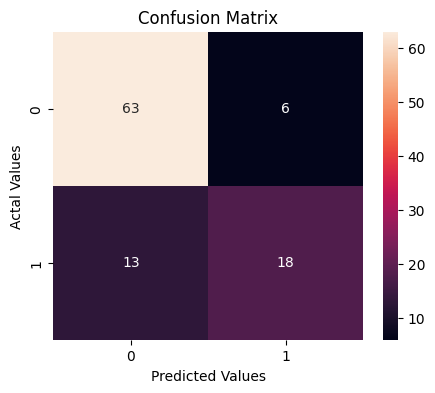

In [24]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()